In [355]:
import numpy as np
import matplotlib.pyplot as plt


In [356]:
domain = (0,1)

In [357]:
x = np.linspace(domain[0], domain[1], 12)
xarg = x * 2 * np.pi
perfect = np.sin(xarg)
print('x', x)
print('perfect', perfect)


x [0.         0.09090909 0.18181818 0.27272727 0.36363636 0.45454545
 0.54545455 0.63636364 0.72727273 0.81818182 0.90909091 1.        ]
perfect [ 0.00000000e+00  5.40640817e-01  9.09631995e-01  9.89821442e-01
  7.55749574e-01  2.81732557e-01 -2.81732557e-01 -7.55749574e-01
 -9.89821442e-01 -9.09631995e-01 -5.40640817e-01 -2.44929360e-16]


In [358]:
noise = np.random.normal(0, 0.1, x.shape[0])
noisy = perfect + noise
print('noisy', noisy)

noisy [-0.07192283  0.54282648  1.05552541  1.00887788  0.58410686  0.24532001
 -0.41228123 -0.71276552 -0.96933768 -0.93940416 -0.55575581  0.00392535]


In [359]:
A = np.array([ [1,i,i*i,i*i*i] for i in x])
print(A)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 9.09090909e-02 8.26446281e-03 7.51314801e-04]
 [1.00000000e+00 1.81818182e-01 3.30578512e-02 6.01051841e-03]
 [1.00000000e+00 2.72727273e-01 7.43801653e-02 2.02854996e-02]
 [1.00000000e+00 3.63636364e-01 1.32231405e-01 4.80841473e-02]
 [1.00000000e+00 4.54545455e-01 2.06611570e-01 9.39143501e-02]
 [1.00000000e+00 5.45454545e-01 2.97520661e-01 1.62283997e-01]
 [1.00000000e+00 6.36363636e-01 4.04958678e-01 2.57700977e-01]
 [1.00000000e+00 7.27272727e-01 5.28925620e-01 3.84673178e-01]
 [1.00000000e+00 8.18181818e-01 6.69421488e-01 5.47708490e-01]
 [1.00000000e+00 9.09090909e-01 8.26446281e-01 7.51314801e-01]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]]


In [360]:
(mw, residuals, rank, s) = np.linalg.lstsq(A, noisy, rcond=None)
print('model weights', mw)
print('model residuals', residuals)

model weights [ -0.08559675  10.92271217 -32.52836961  21.78541756]
model residuals [0.08012707]


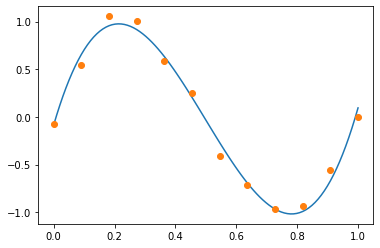

In [361]:
px = np.linspace(domain[0], domain[1], 100)
predicted = [ mw[0] +mw[1]*i +mw[2]*i*i +mw[3]*i*i*i for i in px]
plt.plot(px, predicted)
plt.plot(x,noisy, marker='o', linestyle='None')
plt.show()